Here is the implementation of PCA and KPCA using 2 libraries: PYOD for anomaly detection and sklearn for pakeing the plots with matplotlib. 

References PCA,KPCA: 
1. https://medium.com/dataman-in-ai/handbook-of-anomaly-detection-with-python-outlier-detection-5-pca-d1acbdba1b7e
2. https://github.com/dataman-git/codes_for_articles/blob/master/05.%20PCA.ipynb
3. https://www.datatechnotes.com/2022/01/kernelpca-projection-example-in-python.html
4. https://github.com/JAVI897/Kernel-PCA
5. https://colab.research.google.com/drive/1rrEw6pxir1ilV2XE6U8BuTOtUMyGFjmF?usp=sharing#scrollTo=l-jnnCHShoFm
6. https://pyod.readthedocs.io/en/latest/pyod.models.html
7. https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
8. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA.inverse_transform
9. https://scikit-learn.org/stable/modules/decomposition.html#bakir2003
10. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
11. https://github.com/yzhao062/pyod/blob/master/pyod/models/kpca.py
12. https://github.com/yzhao062/pyod/blob/master/pyod/models/pca.py
13. https://hub.gke2.mybinder.org/user/scikit-learn-scikit-learn-t3cqyeel/lab/tree/notebooks/auto_examples/decomposition/plot_kernel_pca.ipynb


DATASETS:
1. https://archive.ics.uci.edu/ml/datasets/HTRU2#
2. https://archive.ics.uci.edu/ml/datasets/Lymphography

Next DATASETS:
1. https://keras.io/api/datasets/
2. http://odds.cs.stonybrook.edu/
3. https://archive.ics.uci.edu/ml/datasets/


Maybe we should try this implementation:
1. https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py


Questions:
1. 
2. 
3. 

In [57]:
# Import the necessary libraries.
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#!pip install pyod            # normal install
#!pip install --upgrade pyod  # or update if needed
from pyod.models.pca import PCA as PCA_PYOD
from pyod.models.kpca import KPCA as KPCA_PYOD
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
# For working in google_colab
from google.colab import drive
drive.mount('/content/drive')
directory_path = "/content/drive/MyDrive/KPCA_PCA/datasets/"
# Add the folder to your google drive account to run it and change the directory path.
# You can also add Datasets to try it.
# LINK of Datasets: https://drive.google.com/drive/folders/12K1jIqNfU_yVOSdn_pqOX9kIVAgLRFPg?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Save all datasets
dataset_ex = ['.csv', '.data']
datasets = [f for f in os.listdir(directory_path) if ( f.endswith('.data') or f.endswith('.csv') ) and f not in dataset_ex]

In [4]:
datasets

['HTRU_2.csv', 'lymphography.data']

# **Here we have two examples. Try one of**

# For HTRU dataset
17,898 total examples.
1,639 positive examples. as outliers
16,259 negative examples. as inliers

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class


In [121]:
dataset = datasets[0]
df = pd.read_csv(directory_path + dataset, header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

contamination = 1639/17898  # percentage of outliers
n_features = 8              # number of features
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()


,0,1,2,3,4,5,6,7
0,112.695312,54.505527,0.294994,-0.378067,1.218227,13.152757,12.608027,181.027270
1,91.250000,41.684642,0.493899,1.004299,5.581940,24.550797,4.778942,24.754220
2,101.742188,44.636946,0.310742,0.591603,2.793478,18.113863,8.842717,89.845664
3,153.015625,44.935194,-0.302917,0.382111,2.395485,15.315902,9.155241,107.070646
4,76.132812,40.145122,0.872453,2.066096,1.419732,16.189805,12.028558,149.001977



# LYMPHOGRAPHY DATASET:
Data Set Information:

This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also breast-cancer and primary-tumor.)


Attribute Information:

--- NOTE: All attribute values in the database have been entered as numeric values corresponding to their index in the list of attribute values for that attribute domain as given below.
1. class: normal find, metastases, malign lymph, fibrosis
2. lymphatics: normal, arched, deformed, displaced
3. block of affere: no, yes
4. bl. of lymph. c: no, yes
5. bl. of lymph. s: no, yes
6. by pass: no, yes
7. extravasates: no, yes
8. regeneration of: no, yes
9. early uptake in: no, yes
10. lym.nodes dimin: 0-3
11. lym.nodes enlar: 1-4
12. changes in lym.: bean, oval, round
13. defect in node: no, lacunar, lac. marginal, lac. central
14. changes in node: no, lacunar, lac. margin, lac. central
15. changes in stru: no, grainy, drop-like, coarse, diluted, reticular, stripped, faint,
16. special forms: no, chalices, vesicles
17. dislocation of: no, yes
18. exclusion of no: no, yes
19. no. of nodes in: 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, >=70

Class Distribution:
Class:        Number of Instances:

    1. normal find:  2
    2. metastases:   81
    3. malign lymph: 61
    4. fibrosis:     4
The original lymphography dataset from UCI machine learning repository is a classification dataset. It is a multi-class dataset having four classes, but two of them are quite small (2 and 4 data records). Therefore, those two small classes are merged and considered as outliers compared to other two large classes (81 and 61 data records).

In [71]:
dataset = datasets[1]
df = pd.read_csv(directory_path + dataset, header=None)
X = df.iloc[:, 1:].values
df['target'] = df.iloc[:, 0].replace({4: 1, 1: 1, 3: 0, 2: 0})
y = df.iloc[:, -1].values
y

contamination = 6/148  # percentage of outliers
n_features = 18              # number of features
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3,1,1,1,2,2,2,1,3,1,1,4,2,5,3,1,2,4
1,3,2,2,1,2,2,1,1,1,3,3,4,3,4,2,2,2,3
2,2,1,1,1,1,1,1,1,1,2,3,2,2,8,1,2,1,1
3,4,2,1,1,2,2,1,1,1,1,3,3,3,3,3,2,2,3
4,4,2,1,1,2,2,1,2,1,3,3,4,2,5,3,2,2,3


In [100]:
# PCA
pca = PCA_PYOD(n_components=2, contamination=contamination) 
pca.fit(X_train)

# KPCA
kpca = KPCA_PYOD(n_components=2, kernel='rbf', gamma=0.15, contamination=contamination)
kpca.fit(X_train)


KPCA(alpha=None, coef0=None, contamination=0.04054054054054054, copy_X=None,
   degree=None, eigen_solver=None, gamma=None, kernel=None,
   kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
   n_selected_components=None,
   random_state=RandomState(MT19937) at 0x7F48D1053440,
   remove_zero_eig=None, sampling=False, subset_size=20, tol=None)

In [101]:
# PCA
# get the prediction labels and outlier scores of the training data
y_train_pred_pca = pca.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores_pca = pca.decision_scores_  # .decision_scores_ yields the raw outlier scores for the training data

# get the prediction labels and outlier scores of the test data
y_test_scores_pca = pca.decision_function(X_test)
y_test_pred_pca = pca.predict(X_test)


# KPCA
# get the prediction labels and outlier scores of the training data
y_train_pred_kpca = kpca.labels_
y_train_scores_kpca = kpca.decision_scores_

# get the prediction labels and outlier scores of the test data
y_test_scores_kpca = kpca.decision_function(X_test)
y_test_pred_kpca = kpca.predict(X_test)

In [102]:
len(y_test_pred_pca)
y_test_pred_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
pca.get_params()

{'contamination': 0.04054054054054054,
 'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'n_selected_components': None,
 'random_state': None,
 'standardization': True,
 'svd_solver': 'auto',
 'tol': 0.0,
 'weighted': True,
 'whiten': False}

In [104]:
kpca.get_params()

{'alpha': None,
 'coef0': None,
 'contamination': 0.04054054054054054,
 'copy_X': None,
 'degree': None,
 'eigen_solver': None,
 'gamma': None,
 'kernel': None,
 'kernel_params': None,
 'max_iter': None,
 'n_components': 2,
 'n_jobs': None,
 'n_selected_components': None,
 'random_state': RandomState(MT19937) at 0x7F48D1053440,
 'remove_zero_eig': None,
 'sampling': False,
 'subset_size': 20,
 'tol': None}

In [105]:
[pca.explained_variance_,
pca.explained_variance_ratio_]

[array([4.20831525, 2.1930114 ]), array([0.2306359 , 0.12018756])]

In [106]:
print("The threshold of the PCA method for the defined comtanimation rate:" , pca.threshold_)
print("The threshold of the KPCA method for the defined comtanimation rate:" , kpca.threshold_)

The threshold of the PCA method for the defined comtanimation rate: 78.5044870615192
The threshold of the KPCA method for the defined comtanimation rate: 1.0000076428602402


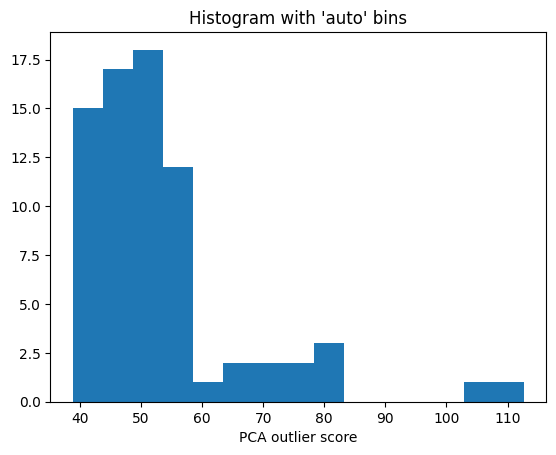

In [107]:
# get the prediction on the test data
y_test_pred_pca = pca.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_pca = pca.decision_function(X_test)  # outlier scores

import matplotlib.pyplot as plt
plt.hist(y_train_scores_pca, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('PCA outlier score')
plt.show()

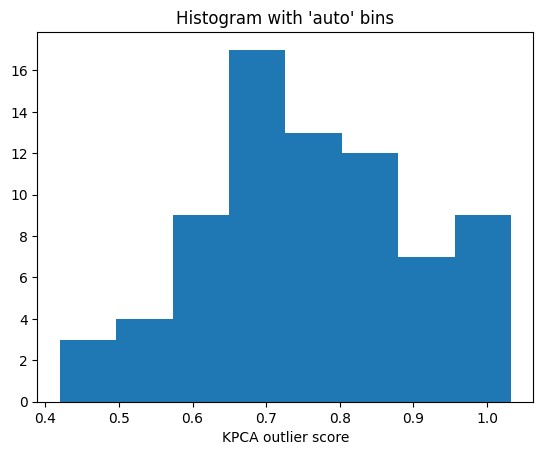

In [108]:
# get the prediction on the test data
y_test_pred_kpca = kpca.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_kpca = kpca.decision_function(X_test)  # outlier scores

import matplotlib.pyplot as plt
plt.hist(y_train_scores_kpca, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('KPCA outlier score')
plt.show()

In [109]:
threshold_pca = pca.threshold_
threshold_kpca = kpca.threshold_

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores_pca, threshold_pca)

,Group,Count,Count %,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,Anomaly_Score
0,Normal,71,95.945946,2.69,1.54,1.14,1.01,1.18,1.44,1.03,...,2.34,2.32,2.86,2.63,5.14,2.14,1.66,1.76,2.13,51.32
1,Outlier,3,4.054054,3.33,1.67,1.67,1.67,2.00,2.00,1.67,...,2.33,2.33,3.67,3.00,5.33,3.00,1.67,2.00,6.33,100.93


In [110]:
descriptive_stat_threshold(X_train,y_train_scores_kpca, threshold_kpca)

,Group,Count,Count %,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,Anomaly_Score
0,Normal,71,95.945946,2.72,1.55,1.15,1.03,1.21,1.46,1.04,...,2.35,2.34,2.92,2.66,5.14,2.17,1.68,1.77,2.15,0.75
1,Outlier,3,4.054054,2.67,1.33,1.33,1.33,1.33,1.33,1.33,...,2.00,2.00,2.33,2.33,5.33,2.33,1.33,1.67,5.67,1.02


In [111]:
Actual_pred_pca = pd.DataFrame({'Actual': y_test, 'Anomaly_Score': y_test_scores_pca})
Actual_pred_pca['Pred'] = np.where(Actual_pred_pca['Anomaly_Score']< threshold_pca,0,1)
pd.crosstab(Actual_pred_pca['Actual'],Actual_pred_pca['Pred'])

Pred,0,1
Actual,,
0,69,2
1,0,3


In [112]:
Actual_pred_kpca = pd.DataFrame({'Actual': y_test, 'Anomaly_Score': y_test_scores_kpca})
Actual_pred_kpca['Pred'] = np.where(Actual_pred_kpca['Anomaly_Score']< threshold_kpca,0,1)
pd.crosstab(Actual_pred_kpca['Actual'],Actual_pred_kpca['Pred'])

Pred,0,1
Actual,,
0,65,6
1,0,3


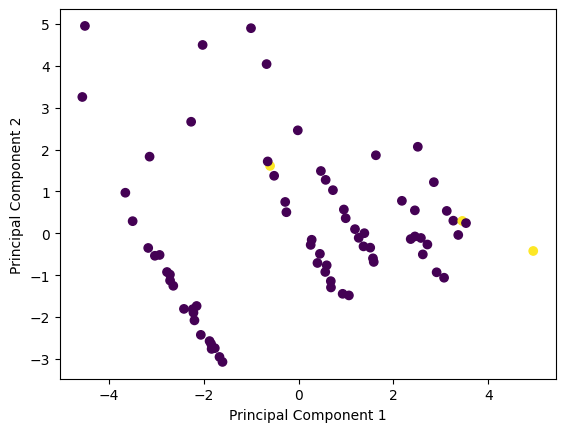

In [119]:
# fit PCA on training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# create a scatter plot of the projected data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


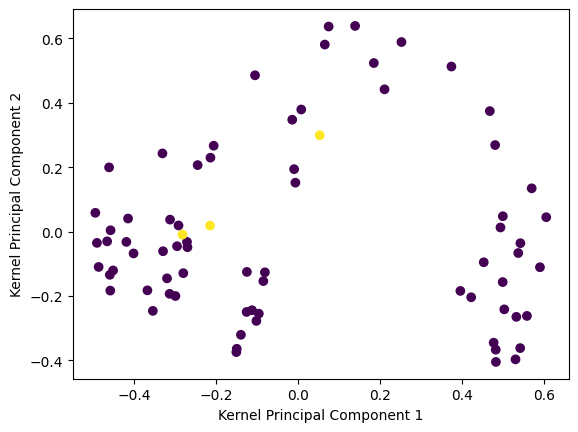

In [118]:
# fit KernelPCA on training data
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca = kpca.fit_transform(X_train)

# create a scatter plot of the projected data
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')
plt.show()

In [115]:
# Define a list of kernel functions and parameters to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

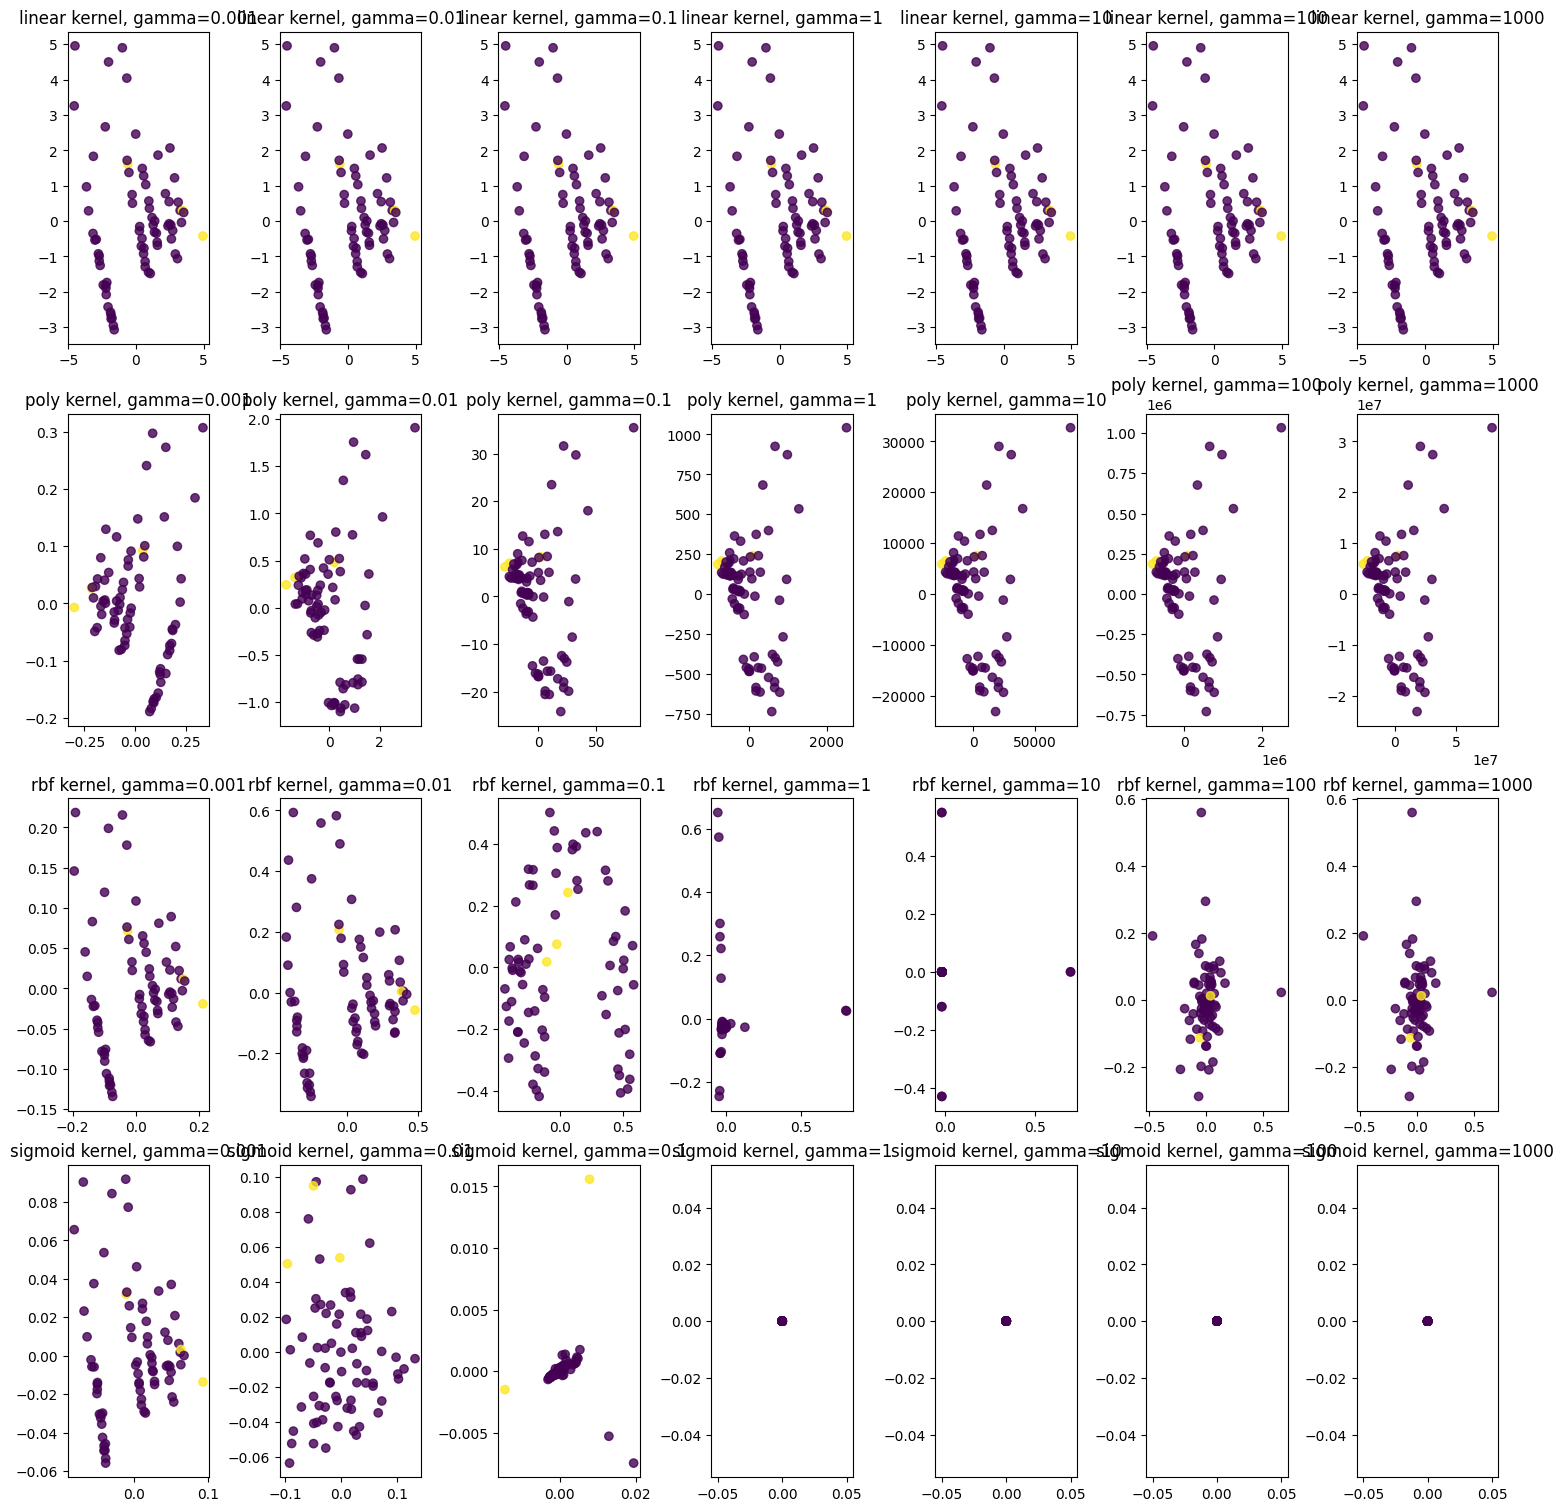

In [116]:
# Perform kernelPCA
# Initialize a subplot grid to plot the results
fig, axs = plt.subplots(len(kernels), len(gammas), figsize=(15, 15), constrained_layout=True)

# Loop over the kernels and gammas and perform KPCA
for i, kernel in enumerate(kernels):
    for j, gamma in enumerate(gammas):
        # Initialize the KPCA transformer and fit the data
        kpca = KernelPCA(n_components=2, kernel=kernel, gamma=gamma)
        X_kpca = kpca.fit_transform(X_train)

        # Plot the results
        axs[i, j].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train, cmap='viridis', alpha=0.8)
        axs[i, j].set_title(f'{kernel} kernel, gamma={gamma}')

plt.show()

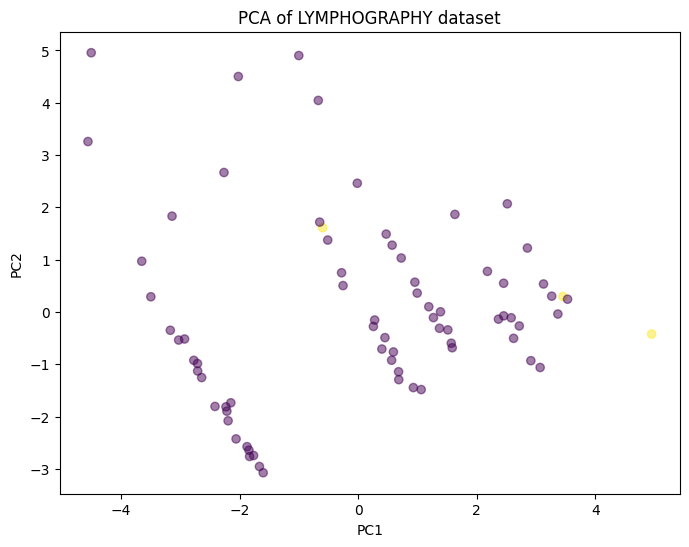

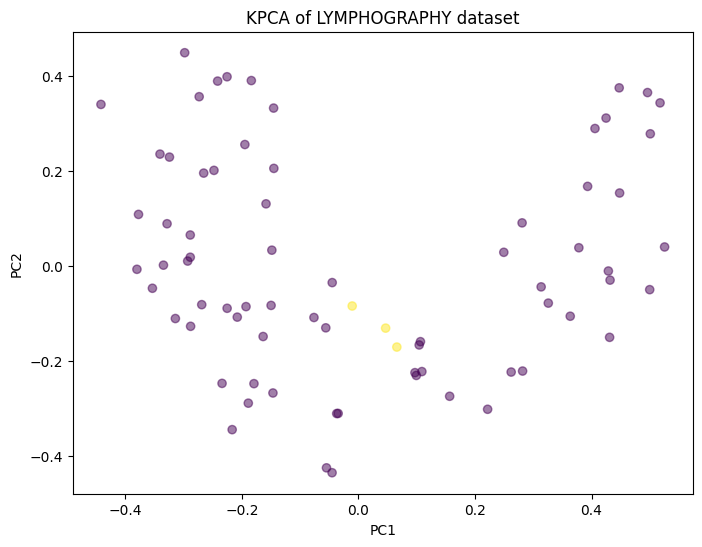

In [120]:
#TRY AGAIN with standardize the data

# Load the dataset
dataset = datasets[1]
df = pd.read_csv(directory_path + dataset, header=None)
X = df.iloc[:, 1:].values
df['target'] = df.iloc[:, 0].replace({4: 1, 1: 1, 3: 0, 2: 0})
y = df.iloc[:, -1].values

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

contamination = 6/148  # percentage of outliers
n_features = 18              # number of features
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

# Perform PCA and transform the data into the new feature space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Perform KPCA and transform the data into the new feature space
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.15)
X_kpca = kpca.fit_transform(X_train)

# Plot the results of PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA of LYMPHOGRAPHY dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Plot the results of KPCA
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('KPCA of LYMPHOGRAPHY dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
